In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import cv2


In [30]:
def image_from_coords(coords):
#     coords_min = ((min(coords[:,0]), min(coords[:,1])))
#     coords[0]+=abs(coords_min[0])
#     coords[1]+=abs(coords_min[1])
    img = np.zeros((max(coords[:,0])+5, max(coords[:,1])+5))
    for coord in coords:
        if np.sum(img[coord[0]-2:coord[0]+2, 
              coord[1]-2:coord[1]+2]) == 0:
            img[coord[0]-1:coord[0]+1,coord[1]-1:coord[1]+1] = 1
    return img, coords
    

### 1- Количество звезд.

В компании AltFuture вышел приказ о создании нового секретного алгоритма для навигации космических кораблей. Эксперт по алгоритмам, разбил задачу на 4 этапа. Первый - найти какое количество звезд имеется на изображении.

На вход даетьсяизображение звездного неба.
На выходе - одно число, количество звезд.

#### ПРИМЕР ВХОД

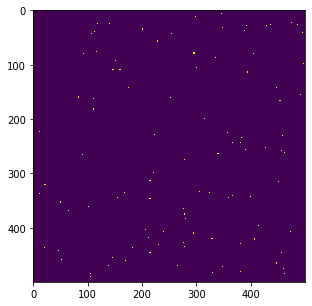

In [5]:
img = plt.imread("tasks/1/0.png")

plt.figure(figsize = (5,5))
plt.imshow(img)


#### ПРИМЕР ВЫХОД

In [9]:
100

100

##### Проверка

In [8]:
import pickle
with open('tasks/1/answer.pickle', 'rb') as f:
    answer = pickle.load(f)
for i in range(len(answer)):
    print("Для изображения 1 - ", answer[i])

Для изображения 1 -  100
Для изображения 1 -  98
Для изображения 1 -  100
Для изображения 1 -  99
Для изображения 1 -  100
Для изображения 1 -  100
Для изображения 1 -  99
Для изображения 1 -  100
Для изображения 1 -  100
Для изображения 1 -  100


### 2- Количество созвездий

Следующий шаг - определить количество созвездий на снике. Будем считать что созвездия - это скопления звезд, находящиеся близко друг к другу. Найдите количество кластеров для изображения. В качестве ответа нужно указать количество кластеров, а так же площади каждого кластера. Площадь кластера вычисляеться как:

w = x_left - x_right
h = y_top - y_bottom
area = w*h

Где, x_left - координата x самой высокой и самой левой звезды из кластера;
x_right - координата x самой низкой и самой правой звезды из кластера;
y_top- координата y самой высокой и самой левой звезды из кластера;
y_bottom - координата y самой высокой и самой левой звезды из кластера;

НА ВХОД: 1 изображение
НА ВЫХОД: через пробел сначала - кол-во кластеров, затем отсортированные в порядке возрастания площади кластеров.

#### ПРИМЕР ВХОД

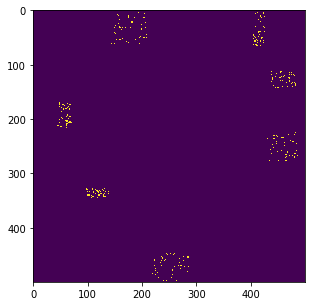

In [10]:
img = plt.imread("tasks/2/0.png")

plt.figure(figsize = (5,5))
plt.imshow(img)

#### ПРИМЕР ВЫХОД

In [13]:
#answer = open("tasks/2/answe0.txt", 'r').readlines()

In [15]:
#print(answer)

7, 680, 1080, 1276, 1302, 2800, 3283, 3705

#### ОТВЕТЫ ДЛЯ ВСЕХ ФАЙЛОВ

In [20]:
for i in range(10):
    answer = open("tasks/2/answe%d.txt"%i, 'r').readlines()
    print("Для изображения %d - "%i, answer[0])

Для изображения 0 -  [7, 680, 1080, 1276, 1302, 2800, 3283, 3705]
Для изображения 1 -  [4, 612, 1224, 1862, 2585]
Для изображения 2 -  [7, 266, 940, 1287, 1296, 1640, 1742, 2847]
Для изображения 3 -  [6, 85, 1428, 1472, 1813, 2200, 2209]
Для изображения 4 -  [5, 195, 252, 480, 966, 1248]
Для изображения 5 -  [6, 598, 658, 1008, 1144, 1222, 2992]
Для изображения 6 -  [4, 605, 960, 1330, 1408]
Для изображения 7 -  [5, 696, 720, 798, 1080, 2208]
Для изображения 8 -  [6, 198, 484, 840, 1150, 2009, 2665]
Для изображения 9 -  [6, 350, 666, 1260, 1350, 1860, 3519]


### 3 - Сопоставьте звезды

Для определения положения космического корабля, часто используют сопоставление звезд, видимых космичесим кораблем, и звезд находящихся в звездном каталоге. Вам предлагаеться написать программу, которая будет сопоставлять звезды находящиеся на изображении и из каталога.

На вход: координаты звезд на изображении (массив), координаты звезд из каталога (массив) 
На выход: звезды из каталога отсортированные в соответсвии с звездами с изображениями. Т.е. если координата звезды из каталога стоит на 0 позиции в массиве - это значит, что эта та же звезда, что стоит на 0 позиции в массиве звезд с изображения.

Ответ считается правильным, если 70% звезд сопоставлены правильно. 

#### ПРИМЕР ВХОДНЫХ ДАННЫХ

In [107]:

task = open("tasks/3/task%d.txt"%0, 'r').readlines()
print(task[0])
print(task[1])

[[455, 182], [230, 412], [32, 437], [237, 185], [147, 3], [340, 256], [143, 437], [86, 85], [289, 318], [171, 192], [155, 247], [465, 133], [23, 262], [432, 285], [25, 81], [146, 452], [173, 487], [102, 8], [257, 494], [431, 193], [177, 193], [491, 199], [171, 104], [28, 371], [323, 55], [445, 153], [49, 183], [248, 344], [207, 323], [179, 108], [444, 120], [204, 321], [170, 305], [91, 434], [430, 126], [3, 336], [12, 134], [11, 493], [342, 428], [195, 117], [340, 361], [109, 217], [470, 349], [349, 75], [283, 138], [177, 66], [350, 102], [297, 3], [397, 412], [95, 190], [185, 194], [285, 382], [225, 225], [172, 242], [445, 462], [123, 82], [186, 402], [66, 213], [232, 431], [325, 75], [214, 231], [135, 489], [468, 268], [388, 314], [215, 4], [18, 213], [251, 281], [27, 55], [107, 173], [378, 418], [348, 224], [8, 110], [115, 11], [488, 357], [108, 183], [408, 282], [467, 306], [159, 287], [437, 493], [405, 484], [22, 245], [124, 265], [234, 373], [273, 341], [497, 348], [498, 354], [3

In [108]:
img1, _ = image_from_coords(np.asarray(eval(task[0])))
img2, _ = image_from_coords(np.asarray(eval(task[1])))

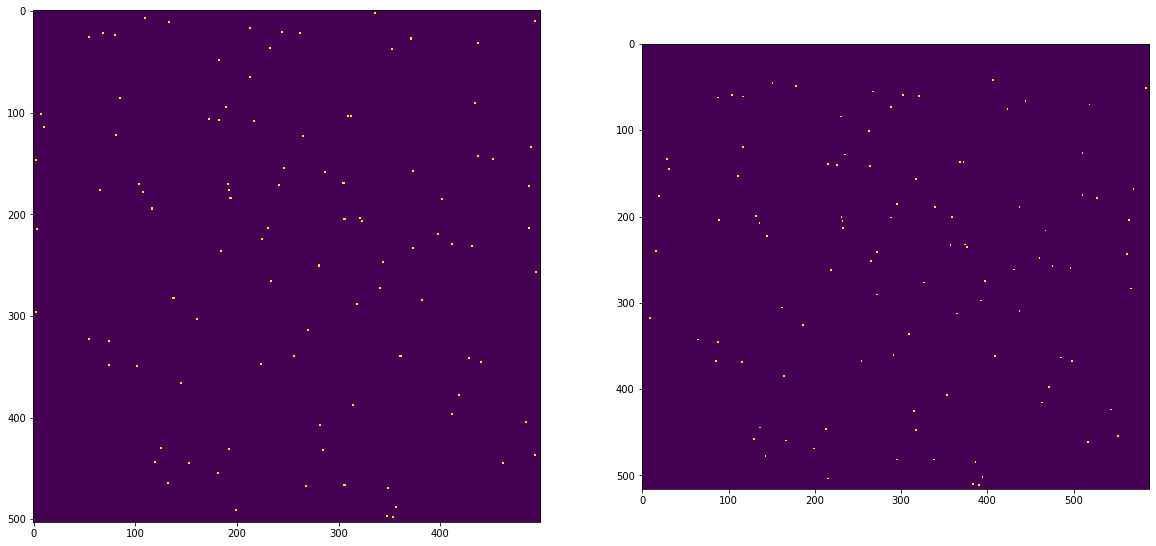

In [109]:
plt.figure(figsize = (20,20))
plt.subplot(1,2,1)
plt.imshow(img1)
plt.subplot(1,2,2)
plt.imshow(img2)

#### ПРИМЕР ОТВЕТА

In [110]:
answer = open("tasks/3/answer%d.txt"%0, 'r').readlines()

In [111]:
print(answer)

['[[469, 199], [258, 475], [71, 518], [263, 219], [177, 20], [361, 291], [176, 510], [120, 117], [313, 365], [201, 231], [186, 295], [478, 143], [61, 321], [448, 317], [62, 117], [179, 527], [205, 564], [134, 29], [284, 566], [447, 213], [206, 232], [504, 215], [200, 132], [67, 444], [343, 65], [460, 167], [85, 230], [275, 397], [236, 376], [208, 136], [458, 130], [233, 374], [201, 359], [127, 510], [445, 137], [43, 406], [50, 178], [52, 583], [364, 485], [223, 145], [362, 409], [142, 264], [485, 386], [368, 86], [306, 162], [205, 89], [369, 116], [318, 9], [416, 463], [129, 235], [214, 233], [310, 437], [252, 265], [202, 288], [462, 516], [154, 111], [217, 467], [102, 263], [260, 496], [346, 88], [242, 272], [169, 569], [482, 295], [407, 353], [241, 16], [56, 267], [277, 326], [63, 88], [140, 215], [398, 471], [368, 254], [46, 151], [146, 31], [502, 394], [141, 226], [426, 315], [482, 338], [190, 339], [455, 551], [424, 543], [60, 302], [157, 317], [262, 431], [298, 392], [510, 383], 

In [112]:
img1, _ = image_from_coords(np.asarray(eval(task[0])))
img2, _ = image_from_coords(np.asarray(eval(answer[0])))

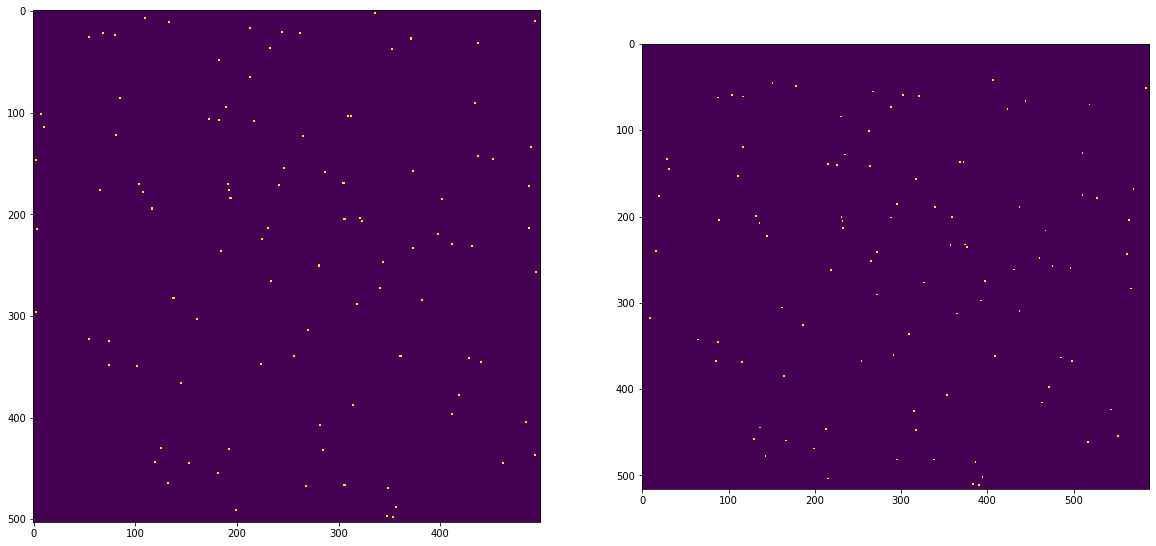

In [113]:
plt.figure(figsize = (20,20))
plt.subplot(1,2,1)
plt.imshow(img1)
plt.subplot(1,2,2)
plt.imshow(img2)

#### ПРОВЕРКА

In [159]:
def check(answer_, right_answer):
    right = 0
    count = 0
    for a,r in zip(answer_,right_answer):
        if sum(a-r)==0:
            right+=1
        count += 1
    return right/count > 0.7

In [160]:
answer_ = np.asarray(eval(answer[0]))
wrong_1  = np.asarray(eval(task[1]))
wrong_2  = np.asarray(eval(task[0]))

check(answer_, answer_)

True

In [161]:
check(wrong_1,answer_)

False

In [162]:
check(wrong_2,answer_)

False